# Práctica 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_SSolarGOA=pd.read_csv('SSolar_GOA.txt')
df_SSolarGOA

,day,time,SZA,global,direct,diffuse
0,120,6,83.303,79.5,327.70,41.2
1,120,7,72.244,274.4,623.70,84.2
2,120,8,61.602,474.6,762.10,105.9
3,120,9,50.120,655.8,837.90,118.5
4,120,10,39.990,801.7,881.60,126.3
5,120,11,31.757,900.7,905.60,130.7
6,120,12,27.396,945.1,915.20,132.5
7,120,13,28.805,931.4,912.30,132.0
8,120,14,35.281,860.7,896.30,129.0
9,120,15,44.591,738.5,864.10,123.1


In [3]:
df_LibRadtran=pd.read_csv('LibRadtran.txt', sep='\s+')
df_LibRadtran['eglo']=df_LibRadtran['eglo']/1000
df_LibRadtran['edir']=df_LibRadtran['edir']/1000
df_LibRadtran['edn']=df_LibRadtran['edn']/1000
df_LibRadtran['eup']=df_LibRadtran['eup']/1000
df_LibRadtran['enet']=df_LibRadtran['enet']/1000
df_LibRadtran

,time,sza,eglo,edir,edn,eup,enet
0,6,83.214,76.62388,36.861480,39.76240,15.324780,61.29910
1,7,72.152,268.60100,188.439600,80.16139,53.720200,214.88080
2,8,60.958,471.73330,366.697800,105.03540,94.346660,377.38660
3,9,49.999,656.10680,534.803900,121.30280,131.221300,524.88540
4,10,39.836,804.38840,672.745800,131.64260,160.877700,643.51070
5,11,31.555,904.82340,767.199800,137.62350,180.964700,723.85870
6,12,27.143,949.91120,809.813600,140.09760,189.982200,759.92890
7,13,28.537,936.32610,796.961900,139.36420,187.265200,749.06090
8,14,35.030,865.09460,729.753200,135.34140,173.018900,692.07560
9,15,44.360,741.52410,614.018800,127.50520,148.304800,593.21920


In [4]:
df=pd.merge(df_SSolarGOA, df_LibRadtran, on='time', how='inner')
df

,day,time,SZA,global,direct,diffuse,sza,eglo,edir,edn,eup,enet
0,120,6,83.303,79.5,327.70,41.2,83.214,76.62388,36.861480,39.76240,15.324780,61.29910
1,120,7,72.244,274.4,623.70,84.2,72.152,268.60100,188.439600,80.16139,53.720200,214.88080
2,120,8,61.602,474.6,762.10,105.9,60.958,471.73330,366.697800,105.03540,94.346660,377.38660
3,120,9,50.120,655.8,837.90,118.5,49.999,656.10680,534.803900,121.30280,131.221300,524.88540
4,120,10,39.990,801.7,881.60,126.3,39.836,804.38840,672.745800,131.64260,160.877700,643.51070
5,120,11,31.757,900.7,905.60,130.7,31.555,904.82340,767.199800,137.62350,180.964700,723.85870
6,120,12,27.396,945.1,915.20,132.5,27.143,949.91120,809.813600,140.09760,189.982200,759.92890
7,120,13,28.805,931.4,912.30,132.0,28.537,936.32610,796.961900,139.36420,187.265200,749.06090
8,120,14,35.281,860.7,896.30,129.0,35.030,865.09460,729.753200,135.34140,173.018900,692.07560
9,120,15,44.591,738.5,864.10,123.1,44.360,741.52410,614.018800,127.50520,148.304800,593.21920


In [5]:
df['direct_h'] = np.cos(np.radians(df['SZA'])) * df['direct']
df['edir_h'] = np.cos(np.radians(df['sza'])) * df['direct']
df.to_csv('datos1')
df

,day,time,SZA,global,direct,diffuse,sza,eglo,edir,edn,eup,enet,direct_h,edir_h
0,120,6,83.303,79.5,327.70,41.2,83.214,76.62388,36.861480,39.76240,15.324780,61.29910,38.215959,38.721470
1,120,7,72.244,274.4,623.70,84.2,72.152,268.60100,188.439600,80.16139,53.720200,214.88080,190.206067,191.159592
2,120,8,61.602,474.6,762.10,105.9,60.958,471.73330,366.697800,105.03540,94.346660,377.38660,362.449809,369.961917
3,120,9,50.120,655.8,837.90,118.5,49.999,656.10680,534.803900,121.30280,131.221300,524.88540,537.246231,538.602941
4,120,10,39.990,801.7,881.60,126.3,39.836,804.38840,672.745800,131.64260,160.877700,643.51070,675.443675,676.964048
5,120,11,31.757,900.7,905.60,130.7,31.555,904.82340,767.199800,137.62350,180.964700,723.85870,770.020749,771.696362
6,120,12,27.396,945.1,915.20,132.5,27.143,949.91120,809.813600,140.09760,189.982200,759.92890,812.558042,814.409638
7,120,13,28.805,931.4,912.30,132.0,28.537,936.32610,796.961900,139.36420,187.265200,749.06090,799.416227,801.463573
8,120,14,35.281,860.7,896.30,129.0,35.030,865.09460,729.753200,135.34140,173.018900,692.07560,731.675835,733.936696
9,120,15,44.591,738.5,864.10,123.1,44.360,741.52410,614.018800,127.50520,148.304800,593.21920,615.357004,617.797768


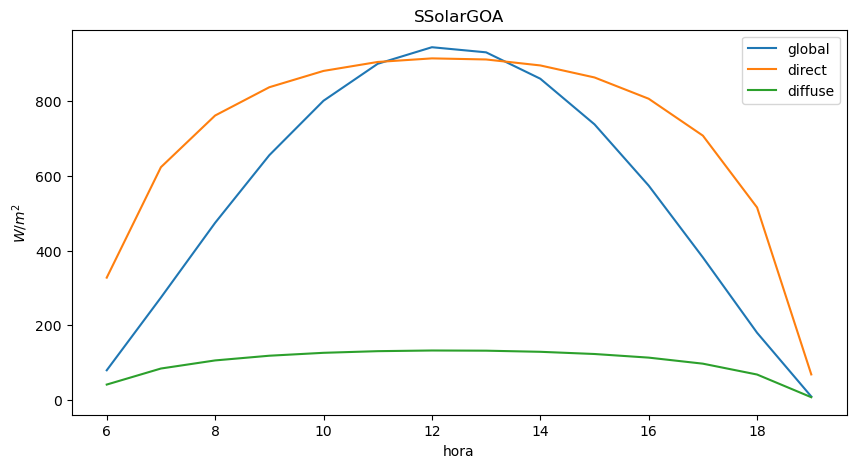

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df['time'],df['global'], label='global')
plt.plot(df['time'],df['direct'], label='direct')
plt.plot(df['time'],df['diffuse'], label='diffuse')
plt.title('SSolarGOA')
plt.xlabel('hora')
plt.ylabel(r'$W/m^2$')
plt.legend()
plt.show()

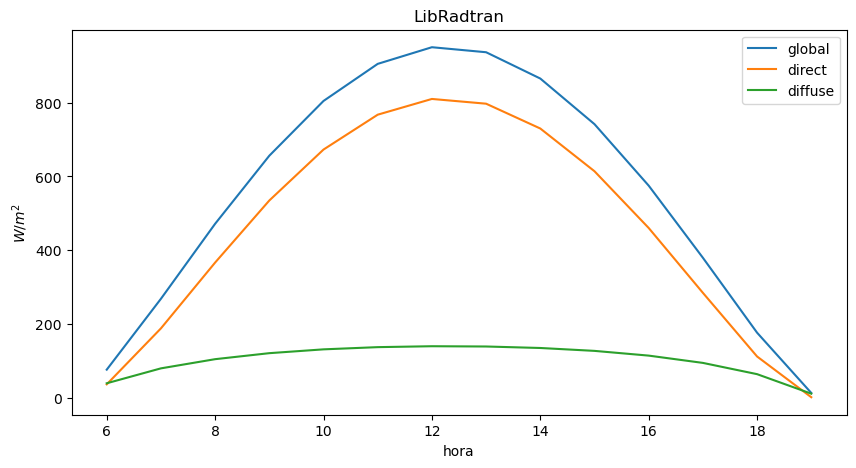

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df['time'],df['eglo'], label='global')
plt.plot(df['time'],df['edir'], label='direct')
plt.plot(df['time'],df['edn'], label='diffuse')
plt.title('LibRadtran')
plt.xlabel('hora')
plt.ylabel(r'$W/m^2$')
plt.legend()
plt.show()

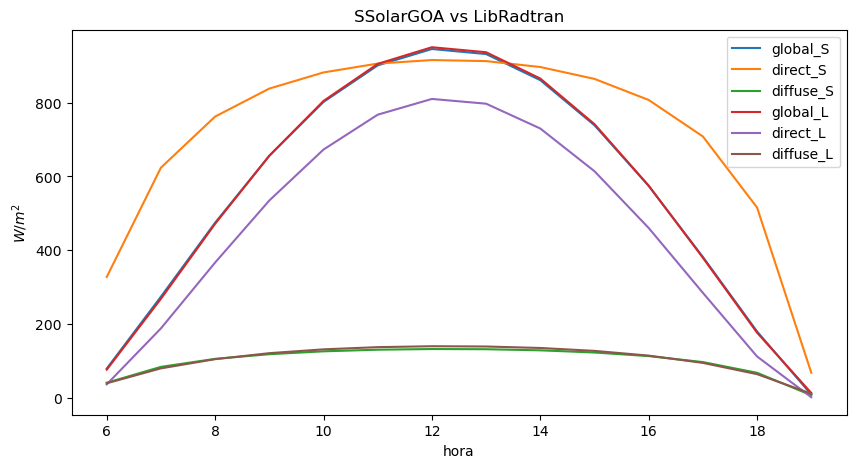

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df['time'],df['global'], label='global_S')
plt.plot(df['time'],df['direct'], label='direct_S')
plt.plot(df['time'],df['diffuse'], label='diffuse_S')
plt.plot(df['time'],df['eglo'], label='global_L')
plt.plot(df['time'],df['edir'], label='direct_L')
plt.plot(df['time'],df['edn'], label='diffuse_L')
plt.title('SSolarGOA vs LibRadtran')
plt.xlabel('hora')
plt.ylabel(r'$W/m^2$')
plt.legend()
plt.show()

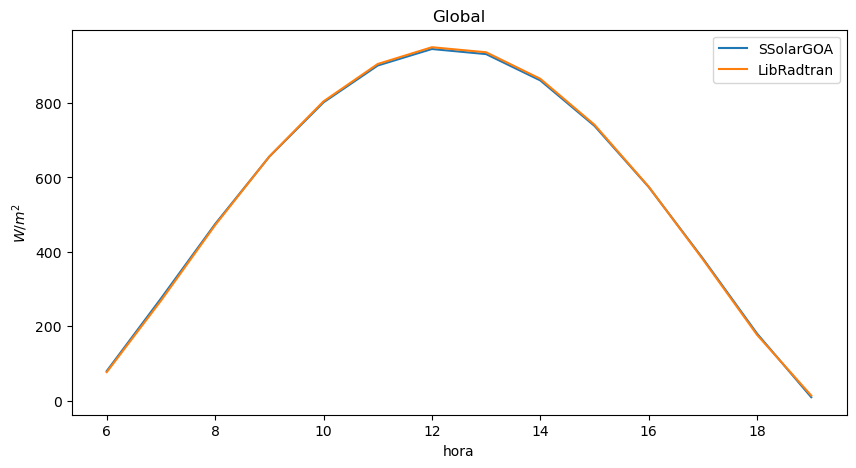

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df['time'],df['global'], label='SSolarGOA')
plt.plot(df['time'],df['eglo'], label='LibRadtran')
plt.title('Global')
plt.xlabel('hora')
plt.ylabel(r'$W/m^2$')
plt.legend()
plt.show()

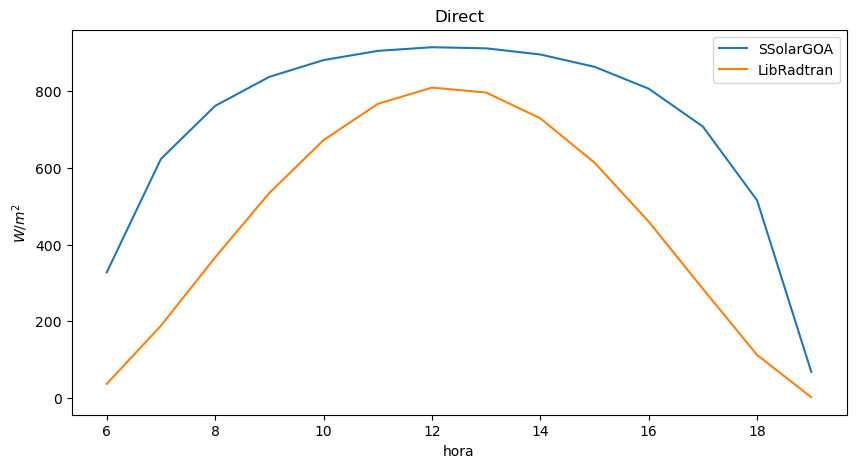

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df['time'],df['direct'], label='SSolarGOA')
plt.plot(df['time'],df['edir'], label='LibRadtran')
plt.title('Direct')
plt.xlabel('hora')
plt.ylabel(r'$W/m^2$')
plt.legend()
plt.show()

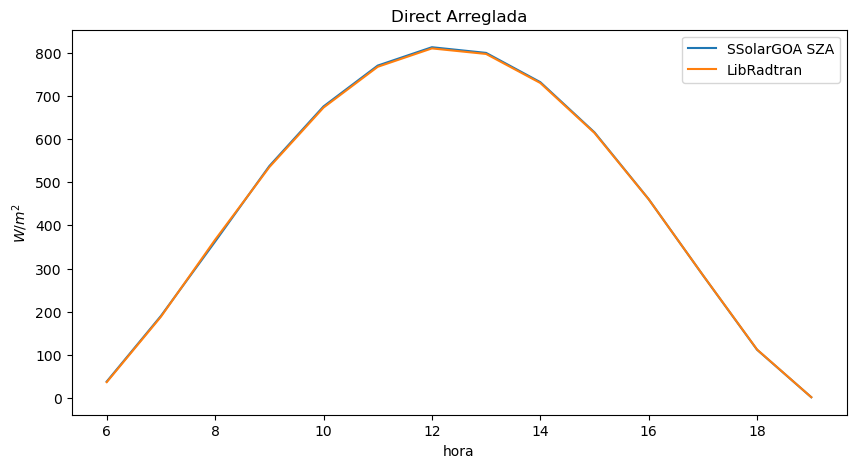

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['time'],df['direct_h'], label='SSolarGOA SZA')
plt.plot(df['time'],df['edir'], label='LibRadtran')
plt.title('Direct Arreglada')
plt.xlabel('hora')
plt.ylabel(r'$W/m^2$')
plt.legend()
plt.show()

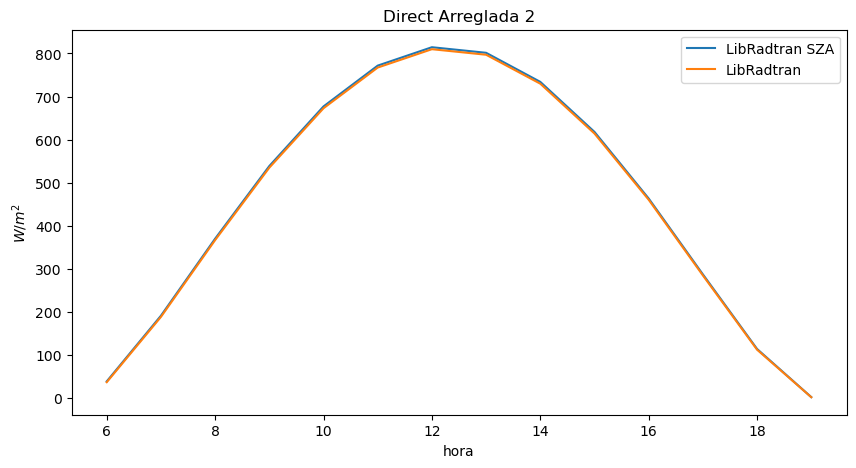

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df['time'],df['edir_h'], label='LibRadtran SZA')
plt.plot(df['time'],df['edir'], label='LibRadtran')
plt.title('Direct Arreglada 2')
plt.xlabel('hora')
plt.ylabel(r'$W/m^2$')
plt.legend()
plt.show()

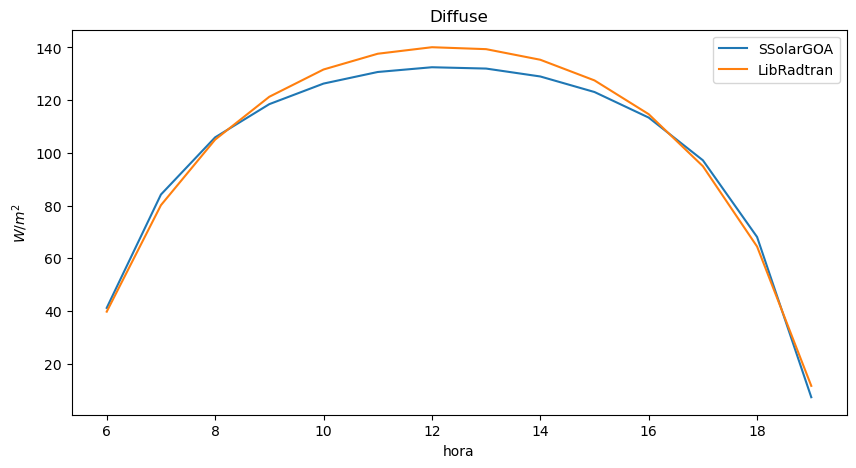

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df['time'],df['diffuse'], label='SSolarGOA')
plt.plot(df['time'],df['edn'], label='LibRadtran')
plt.title('Diffuse')
plt.xlabel('hora')
plt.ylabel(r'$W/m^2$')
plt.legend()
plt.show()